In [1]:
#necessary imports

import GPy
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
import plotly.offline as py

In [34]:
X = np.random.uniform(-5.,5.,(5,1))
Y = np.sin(X) + np.random.randn(5,1)*0.05

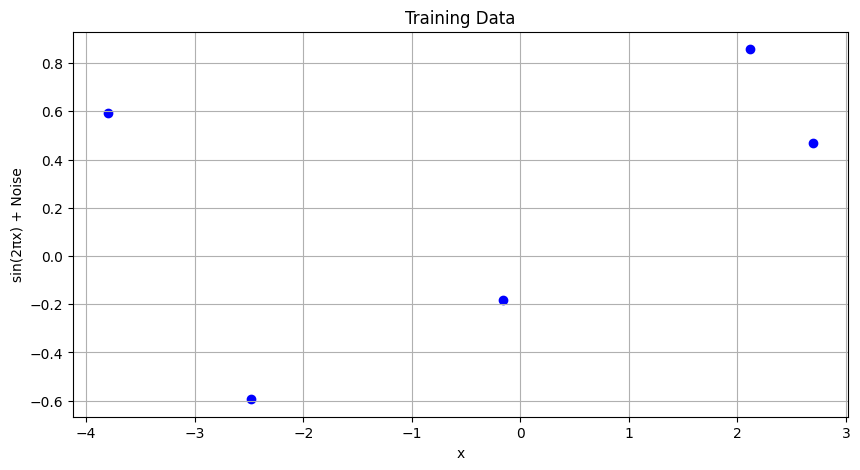

In [35]:
# Plotting the data
plt.figure(figsize=(10, 5))
plt.scatter(X, Y, color='blue')
plt.title('Training Data')
plt.xlabel('x')
plt.ylabel('sin(2πx) + Noise')
plt.grid(True)
plt.show()

In [36]:
# Initialize the kernel
kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s02  0004   1.028474e+00   1.383059e-01 

    00s02  0006   7.631379e-01   3.673661e-04 
    00s04  0011   7.600537e-01   2.440478e-07 
    00s06  0016   7.600325e-01   2.034407e-10 
    00s06  0017   7.600325e-01   2.034407e-10 
Runtime:     00s06
Optimization status: Converged

Optimization restart 1/10, f = 0.7600325155712654
Optimization restart 2/10, f = 0.7600321626064772
Optimization restart 3/10, f = 0.7600321651616448
Optimization restart 4/10, f = 0.7600321900257581
Optimization restart 5/10, f = 0.7600321692066425
Optimization restart 6/10, f = 0.7600321914754229
Optimization restart 7/10, f = 0.7600324858503757
Optimization restart 8/10, f = 0.7600321626213864
Optimization restart 9/10, f = 0.7600323489831257
Optimization restart 10/10, f = 0.7600321672981869


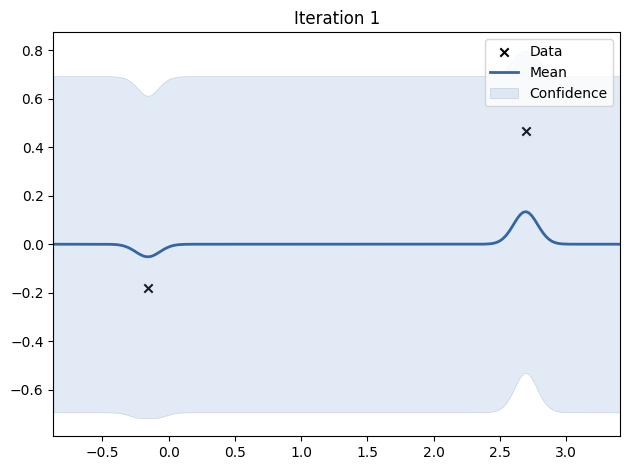

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s00  0003   2.592235e+00   9.576916e-03 
    00s01  0007   2.586820e+00   4.437528e-12 
Runtime:     00s01
Optimization status: Converged

Optimization restart 1/10, f = 2.5868203460707795
Optimization restart 2/10, f = 1.9397828389950689
Optimization restart 3/10, f = 1.9397828382362778
Optimization restart 4/10, f = 1.9397830277734553
Optimization restart 5/10, f = 1.9397827890294534
Optimization restart 6/10, f = 1.9397829398732482
Optimization restart 7/10, f = 1.9397828584795387
Optimization restart 8/10, f = 1.939782793602077
Optimization restart 9/10, f = 1.939782794356468
Optimization restart 10/10, f = 1.9397828015709886


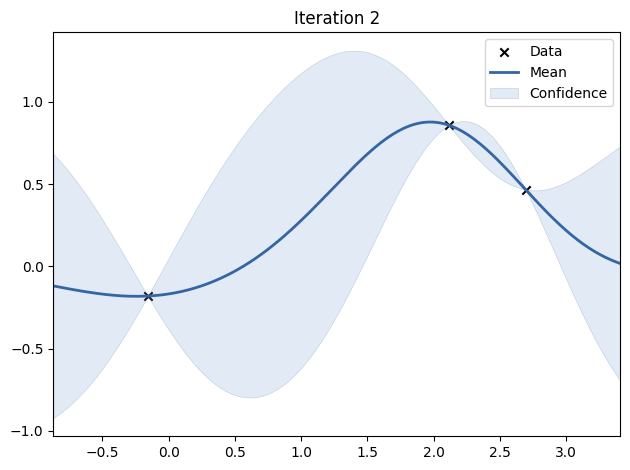

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s03  0008   2.842768e+00   2.482447e-14 
Runtime:     00s03
Optimization status: Converged

Optimization restart 1/10, f = 2.842768328780323
Optimization restart 2/10, f = 2.8427683315642023
Optimization restart 3/10, f = 2.8427684094836927
Optimization restart 4/10, f = 2.8427687141049724
Optimization restart 5/10, f = 2.8427683365291263
Optimization restart 6/10, f = 2.842768454772926
Optimization restart 7/10, f = 2.842768463794609
Optimization restart 8/10, f = 2.842768763549609
Optimization restart 9/10, f = 2.842768490790058
Optimization restart 10/10, f = 2.842768333343278


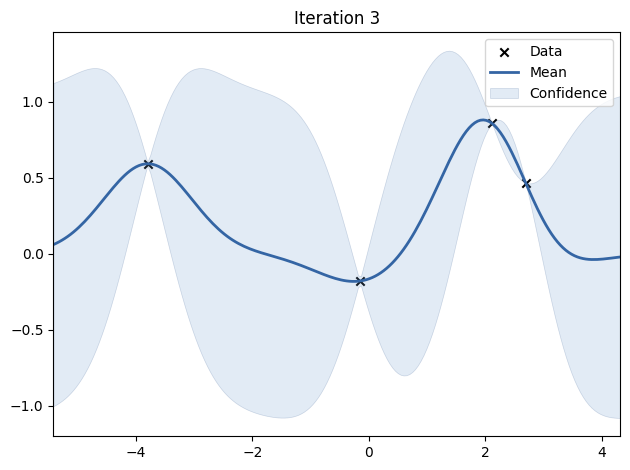

Running L-BFGS-B (Scipy implementation) Code:
  runtime   i      f              |g|        
    00s02  0007   3.904234e+00   1.499763e-08 
    00s02  0009   3.904234e+00   1.719813e-10 
Runtime:     00s02
Optimization status: Converged

Optimization restart 1/10, f = 3.904234314308671
Optimization restart 2/10, f = 3.9042343124642063
Optimization restart 3/10, f = 3.9042343126985752
Optimization restart 4/10, f = 3.904235722193562
Optimization restart 5/10, f = 3.9042343177343843
Optimization restart 6/10, f = 3.904234319252567
Optimization restart 7/10, f = 3.9042343409572005
Optimization restart 8/10, f = 3.9042344414585273
Optimization restart 9/10, f = 3.904234355931746
Optimization restart 10/10, f = 3.904234313600196


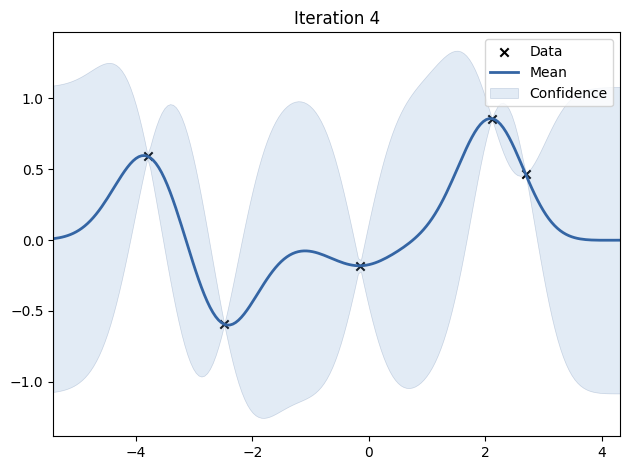

In [37]:
# Start with an empty model or with the first data point
X_train = np.array([[X[0, 0]]])
Y_train = np.array([[Y[0, 0]]])
m = GPy.models.GPRegression(X_train, Y_train, kernel)

# Loop over the dataset, adding one data point at a time
for i in range(1, len(X)):
    # Add the next data point
    X_train = np.vstack((X_train, [[X[i, 0]]]))
    Y_train = np.vstack((Y_train, [[Y[i, 0]]]))

    # Update the model with new data
    m.set_XY(X_train, Y_train)

    # Optimize the model
    m.optimize(messages=True)
    m.optimize_restarts(num_restarts = 10)
    
    # Plot the current state of the model
    fig = m.plot()
    plt.title(f'Iteration {i}')
    plt.show()